<a href="https://colab.research.google.com/github/usm1ai/usm1ai/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from scipy.signal import cheby2, filtfilt

In [2]:
acc_wtc = pd.DataFrame(np.load('/content/drive/MyDrive/IEEE Access JB/IEEE Access JB/acc_wtc.npy', allow_pickle=True))
acc_mob = pd.DataFrame(np.load('/content/drive/MyDrive/IEEE Access JB/IEEE Access JB/acc_mob.npy', allow_pickle=True))
gps_wtc = pd.DataFrame(np.load('/content/drive/MyDrive/IEEE Access JB/IEEE Access JB/gps_wtc.npy', allow_pickle=True))
gps_mob = pd.DataFrame(np.load('/content/drive/MyDrive/IEEE Access JB/IEEE Access JB/gps_mob.npy', allow_pickle=True))
ori_wtc = pd.DataFrame(np.load('/content/drive/MyDrive/IEEE Access JB/IEEE Access JB/ori_wtc.npy', allow_pickle=True))
ori_mob = pd.DataFrame(np.load('/content/drive/MyDrive/IEEE Access JB/IEEE Access JB/ori_mob.npy', allow_pickle=True))

acc_wtc = acc_wtc.rename(columns={0: 'acc_x', 1: 'acc_y', 2: 'acc_z', 3: 'location', 4: 'activity'})
acc_mob = acc_mob.rename(columns={0: 'acc_x', 1: 'acc_y', 2: 'acc_z', 3: 'location', 4: 'activity'})
ori_wtc = ori_wtc.rename(columns={0: 'ori_x', 1: 'ori_y', 2: 'ori_z', 3: 'location', 4: 'activity'})
ori_mob = ori_mob.rename(columns={0: 'ori_x', 1: 'ori_y', 2: 'ori_z', 3: 'location', 4: 'activity'})
gps_wtc = gps_wtc.rename(columns={0: 'long', 1: 'lat', 2: 'location', 3: 'activity'})
gps_mob = gps_mob.rename(columns={0: 'long', 1: 'lat', 2: 'location', 3: 'activity'})

In [3]:
acc_activity_wtc = acc_wtc.drop(['location'], axis=1)
acc_location_wtc = acc_wtc.drop(['activity'], axis=1)
acc_activity_mob = acc_mob.drop(['location'], axis=1)
acc_location_mob = acc_mob.drop(['activity'], axis=1)

ori_activity_wtc = ori_wtc.drop(['location'], axis=1)
ori_location_wtc = ori_wtc.drop(['activity'], axis=1)
ori_activity_mob = ori_mob.drop(['location'], axis=1)
ori_location_mob = ori_mob.drop(['activity'], axis=1)

gps_activity_wtc = gps_wtc.drop(['location'], axis=1)
gps_location_wtc = gps_wtc.drop(['activity'], axis=1)
gps_activity_mob = gps_mob.drop(['location'], axis=1)
gps_location_mob = gps_mob.drop(['activity'], axis=1)

In [4]:
# prompt: In acc_activity_wtc, there are eight classes including 'Sitting', 'Climbing (up)', 'Standing', 'Running', 'Walking', 'Recumbency', 'Climbing (down)', and 'Jumping'
# I want you to pick 300 samples from each class using acc_activity_wtc. If any class has samples less than 300 then use that number to pick samples. I want equal representation of the classes in the final data

def pick_samples_activity(data, num_samples_per_class):
  classes = data['activity'].unique()
  sampled_data = pd.DataFrame()
  for class_label in classes:
    class_data = data[data['activity'] == class_label]
    num_samples = min(num_samples_per_class, len(class_data))
    sampled_class_data = class_data.sample(n=num_samples)
    sampled_data = pd.concat([sampled_data, sampled_class_data])
  return sampled_data

sampled_acc_activity_wtc = pick_samples_activity(acc_activity_wtc, 300).reset_index(drop=True)
sampled_acc_activity_mob = pick_samples_activity(acc_activity_mob, 300).reset_index(drop=True)
sampled_ori_activity_wtc = pick_samples_activity(ori_activity_wtc, 300).reset_index(drop=True)
sampled_ori_activity_mob = pick_samples_activity(ori_activity_mob, 300).reset_index(drop=True)
sampled_gps_activity_wtc = pick_samples_activity(gps_activity_wtc, 300).reset_index(drop=True)
sampled_gps_activity_mob = pick_samples_activity(gps_activity_mob, 300).reset_index(drop=True)



In [5]:
acc_activity_wtc

,acc_x,acc_y,acc_z,activity
0,-1.686744,-13.258591,-2.588956,Climbing (down)
1,-1.176798,2.824315,9.257478,Climbing (down)
2,-0.313813,-8.551398,-2.392822,Climbing (down)
3,-2.902768,-15.729866,-1.216025,Climbing (down)
4,-1.019892,-9.179024,-2.314369,Climbing (down)
...,...,...,...,...
16023,-1.570596,-9.318831,-1.96564,Standing
16024,-2.428918,-9.903017,-1.595735,Standing
16025,-1.674146,-9.862315,-1.574188,Standing
16026,-0.840365,-9.416395,-2.39899,Standing


In [6]:
Counter(sampled_gps_activity_mob['activity'])

Counter({'Sitting': 300,
         'Standing': 300,
         'Walking': 300,
         'Climbing (up)': 6,
         'Recumbency': 140,
         'Climbing (down)': 8,
         'Running': 25})

In [7]:
def pick_samples_location(data, num_samples_per_class):
  classes = data['location'].unique()
  sampled_data = pd.DataFrame()
  for class_label in classes:
    class_data = data[data['location'] == class_label]
    num_samples = min(num_samples_per_class, len(class_data))
    sampled_class_data = class_data.sample(n=num_samples)
    sampled_data = pd.concat([sampled_data, sampled_class_data])
  return sampled_data

sampled_acc_location_wtc = pick_samples_location(acc_location_wtc, 300).reset_index(drop=True)
sampled_acc_location_mob = pick_samples_location(acc_location_mob, 300).reset_index(drop=True)
sampled_ori_location_wtc = pick_samples_location(ori_location_wtc, 300).reset_index(drop=True)
sampled_ori_location_mob = pick_samples_location(ori_location_mob, 300).reset_index(drop=True)
sampled_gps_location_wtc = pick_samples_location(gps_location_wtc, 300).reset_index(drop=True)
sampled_gps_location_mob = pick_samples_location(gps_location_mob, 300).reset_index(drop=True)

In [8]:
Counter(sampled_gps_location_wtc['location'])

Counter({'Building': 300,
         'Home': 300,
         'Workplace': 300,
         'Road': 300,
         'Transportation': 300,
         'Office': 198})

In [9]:
acc_activity = pd.concat([sampled_acc_activity_wtc, sampled_acc_activity_mob], ignore_index=True)
acc_location = pd.concat([sampled_acc_location_wtc, sampled_acc_location_mob], ignore_index=True)

ori_activity = pd.concat([sampled_ori_activity_wtc, sampled_ori_activity_mob], ignore_index=True)
ori_location = pd.concat([sampled_ori_location_wtc, sampled_ori_location_mob], ignore_index=True)

gps_activity = pd.concat([sampled_gps_activity_wtc, sampled_gps_activity_mob], ignore_index=True)
gps_location = pd.concat([sampled_gps_location_wtc, sampled_gps_location_mob], ignore_index=True)

In [10]:
Counter(acc_activity['activity'])

Counter({'Climbing (down)': 600,
         'Climbing (up)': 600,
         'Sitting': 600,
         'Standing': 600,
         'Walking': 600,
         'Recumbency': 600,
         'Jumping': 214,
         'Running': 600})

In [11]:
acc_activity

,acc_x,acc_y,acc_z,activity
0,-1.252766,-6.943783,-1.950077,Climbing (down)
1,-0.727837,6.780379,1.034295,Climbing (down)
2,-0.588399,-7.570734,-2.000557,Climbing (down)
3,2.643199,7.469909,1.072602,Climbing (down)
4,-2.913743,-9.642049,-1.454478,Climbing (down)
...,...,...,...,...
4409,-0.672172,-15.225328,-3.801394,Running
4410,-5.736847,0.213989,1.322494,Running
4411,2.832489,-0.064514,-9.467728,Running
4412,1.335236,-7.253235,-4.140457,Running


In [12]:
# prompt: from acc_activity, extract all samples that belong to walking. use .loc function

walking_samples = acc_activity[acc_activity['activity'] == 'Walking'].reset_index(drop=True)


In [13]:
walking_samples

,acc_x,acc_y,acc_z,activity
0,0.823456,10.425781,-1.224503,Walking
1,3.239953,-13.934853,2.15119,Walking
2,-3.562572,11.595118,-5.740697,Walking
3,6.395905,-14.732361,1.243942,Walking
4,2.424728,12.191874,-0.501585,Walking
...,...,...,...,...
595,0.353039,-9.610517,0.980665,Walking
596,-0.485748,-8.69812,-2.68129,Walking
597,-2.182913,9.041104,-0.84216,Walking
598,0.745305,-9.532063,-0.862985,Walking


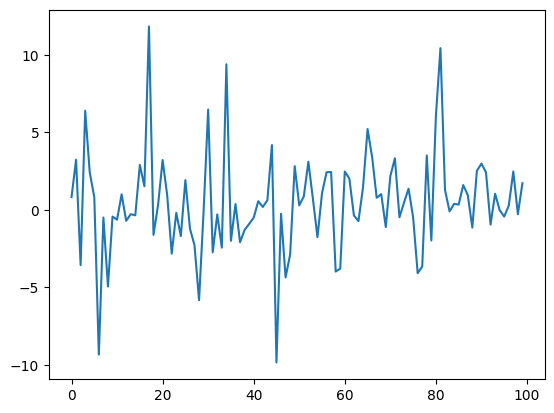

In [14]:
plt.plot(walking_samples['acc_x'][:100])

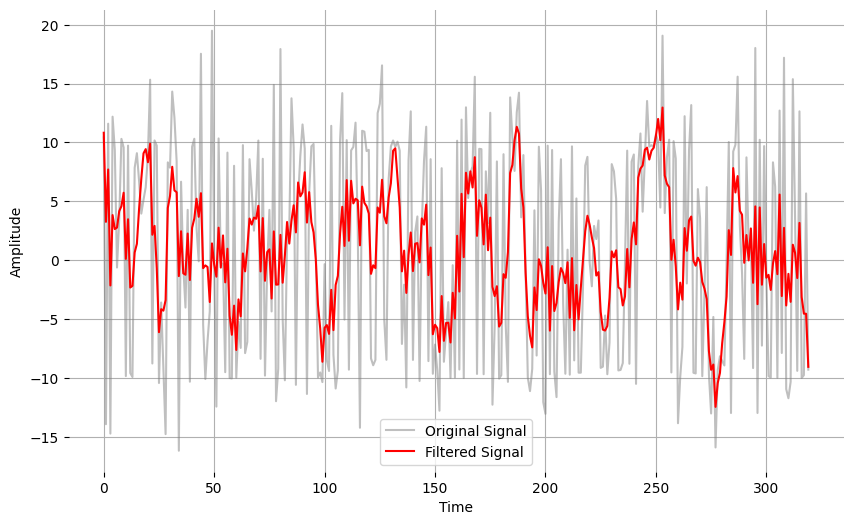

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cheby2, filtfilt

# Generate a noisy 1-D signal
t = np.linspace(0, 1, 120)
# signal = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(1000)
signal = np.array(walking_samples['acc_y'][:320])

# Define filter specifications
order = 4          # Filter order
fs = 500.0        # Sampling frequency (Hz) - Ensure it's a float
fc = 50.0          # Cutoff frequency (Hz) - Ensure it's a float
rp = 5             # Passband ripple (dB)

# Design Chebyshev Type-II filter
b, a = cheby2(order, rp, fc, fs=fs, analog=False, output='ba')

# Apply the filter to the signal
filtered_signal = filtfilt(b, a, signal)

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(signal, label='Original Signal', color='grey', alpha=0.5)
plt.plot(filtered_signal, label='Filtered Signal', color='r')
plt.xlabel('Time')
plt.ylabel('Amplitude')
# plt.title('1-D Signal with Chebyshev Type-II Filter')
plt.legend()
plt.grid(True)
plt.box(False)
plt.show()


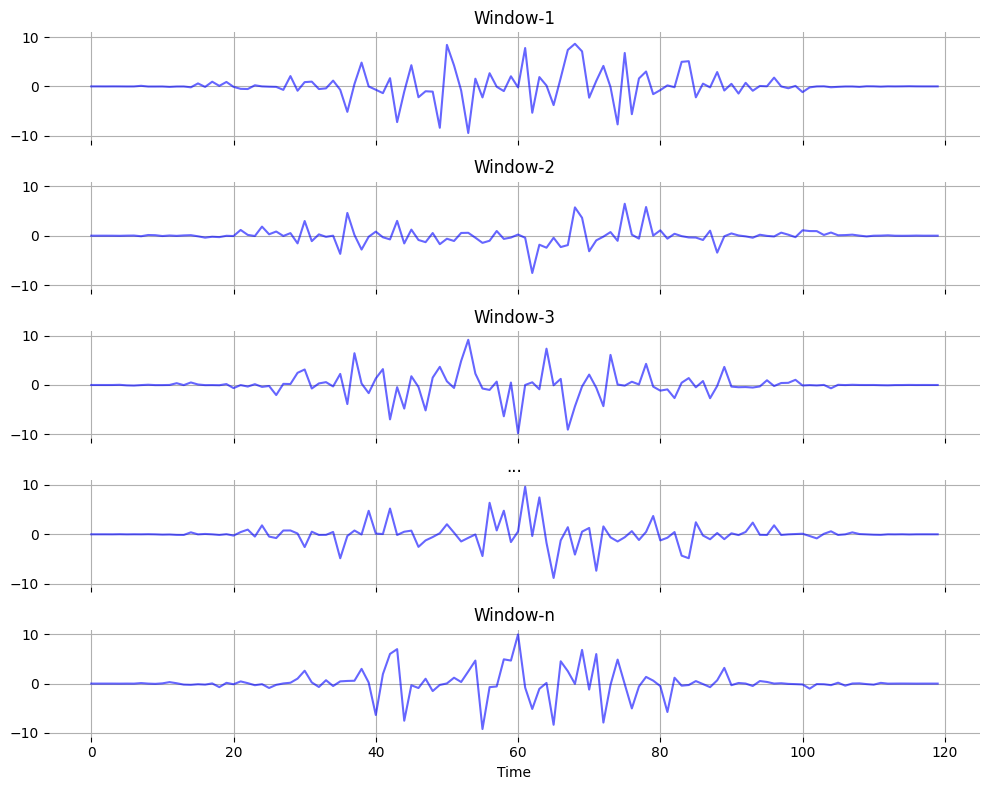

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sample signal of length 600
signal_length = 600
signal = np.array(walking_samples['acc_z'])

# Apply Blackman window
window = np.blackman(120)

# Divide the signal into 5 windows
num_windows = 5
window_length = 120
windows = [signal[i:i+window_length] * window for i in range(0, signal_length - window_length + 1, window_length)]

order = 4          # Filter order
fs = 500.0         # Sampling frequency (Hz)
fc = 50.0          # Cutoff frequency (Hz)
rp = 5             # Passband ripple (dB)
b, a = cheby2(order, rp, fc, fs=fs, analog=False, output='ba')
win_name = ['1', '2', '3', '...', 'n']
# Plotting
fig, axes = plt.subplots(num_windows, 1, figsize=(10, 8), sharex=True, sharey=True)
for i in range(num_windows):
    filtered_signal = filtfilt(b, a, windows[i])
    axes[i].plot(windows[i], color='blue', alpha=0.6)
    # axes[i].set_title(f'Window {i+1}')
    if i==3:
      axes[i].set_title(win_name[i])
    else:
      axes[i].set_title(f'Window-{win_name[i]}')
    axes[i].grid(True)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
plt.xlabel('Time')
# plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()
